# CNN_UTK_Model for Age detection

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

### Data preprocessing

In [2]:
df = pd.read_csv('./dataset/UTK_dataset.csv')
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [4]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [5]:
df.isna().sum()

age          0
ethnicity    0
gender       0
img_name     0
pixels       0
dtype: int64

In [6]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


### Data analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

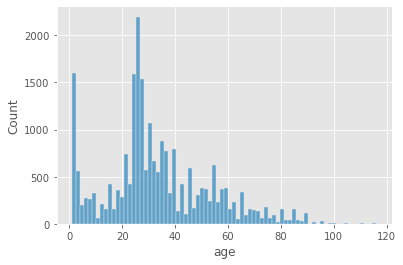

In [7]:
sns.histplot(data=df, x='age')

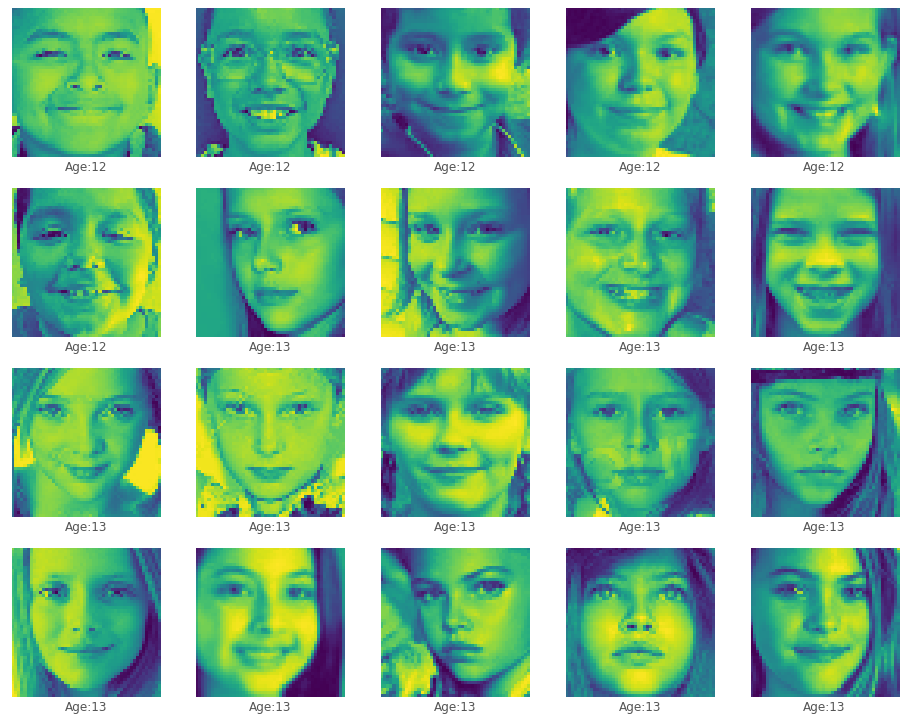

In [8]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i]))
plt.show()

In [9]:
X = np.array(df['pixels'].tolist())
y = df['age']

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
X = X.reshape(X.shape[0],48,48,1)

In [12]:
X[:5].shape

(5, 48, 48, 1)

In [13]:
y[:5].shape

(5,)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Model creation

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

In [21]:
model = Sequential()

model.add(InputLayer(input_shape=(48, 48, 1)))
model.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='tanh'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss="mse", optimizer="adam", metrics=["mae", "accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                51232     
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

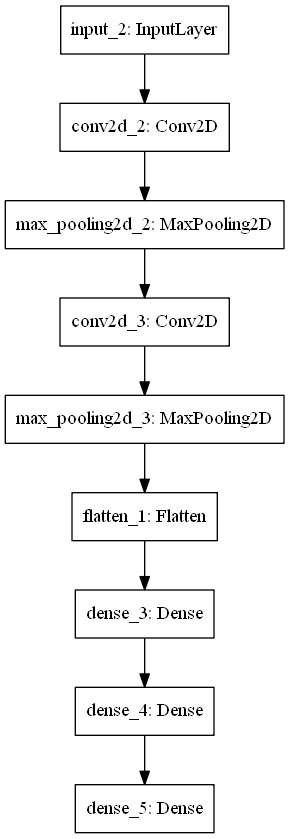

In [22]:
plot_model(model, to_file='models/cnn_utk_model_2.png')

In [23]:
filepath = 'checkpoints/age_utk_model_2_normalized.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor="val_loss", save_best_only=True, mode="min", verbose=1)

In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/10
333/334 [============================>.] - ETA: 0s - loss: 440.2253 - mae: 16.0557 - accuracy: 0.0475
Epoch 00001: val_loss improved from inf to 374.89871, saving model to checkpoints\age_utk_model_2_normalized.epoch01-loss374.90.hdf5
334/334 [==============================] - 16s 48ms/step - loss: 440.2056 - mae: 16.0552 - accuracy: 0.0475 - val_loss: 374.8987 - val_mae: 14.8582 - val_accuracy: 0.0439
Epoch 2/10
334/334 [==============================] - ETA: 0s - loss: 382.7832 - mae: 15.0629 - accuracy: 0.0478
Epoch 00002: val_loss improved from 374.89871 to 333.26367, saving model to checkpoints\age_utk_model_2_normalized.epoch02-loss333.26.hdf5
334/334 [==============================] - 16s 48ms/step - loss: 382.7832 - mae: 15.0629 - accuracy: 0.0478 - val_loss: 333.2637 - val_mae: 14.1837 - val_accuracy: 0.0439
Epoch 3/10
333/334 [============================>.] - ETA: 0s - loss: 299.9085 - mae: 13.3364 - accuracy: 0.0478
Epoch 00003: val_loss improved from 333.26367 t

<AxesSubplot:>

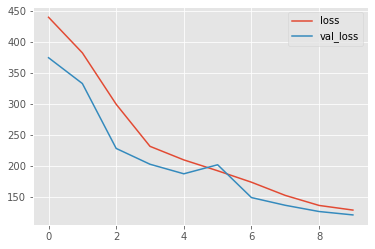

In [25]:
pd.DataFrame(model.history.history)[["loss", "val_loss"]].plot()

In [26]:
y_pred = model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

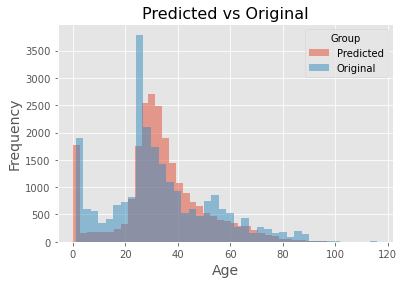

In [27]:
pd.Series(y_pred.reshape((len(y_pred)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

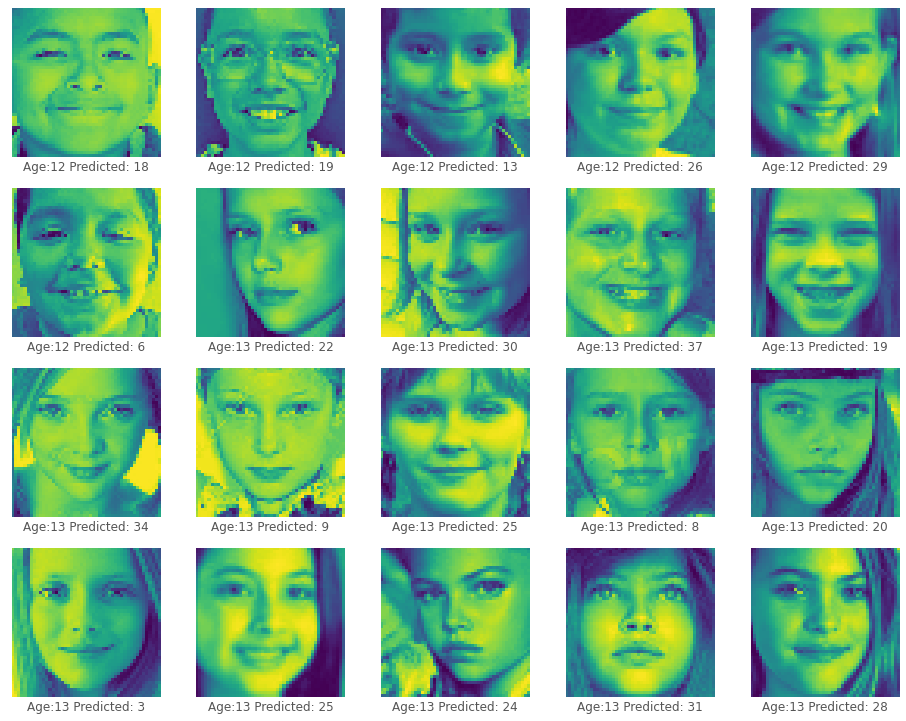

In [30]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(round(y_pred[i][0])))
plt.show()

### Predictions for best model

In [31]:
import os
path = os.getcwd() + r'\checkpoints\age_utk_model_2_normalized.epoch10-loss121.29.hdf5'

In [32]:
best_model = tf.keras.models.load_model(path)

In [33]:
y_pred_best = best_model.predict(X)

Text(0.5, 1.0, 'Predicted vs Original')

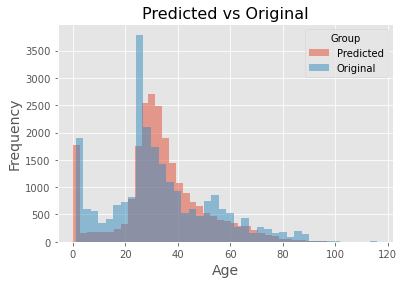

In [34]:
pd.Series(y_pred.reshape((len(y_pred_best)))).plot(kind='hist', bins=40, label='Predicted', alpha=0.5)
y.plot(kind='hist', bins=40, label='Original', alpha=0.5)

plt.legend(title='Group')

plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.title('Predicted vs Original', fontsize=16)

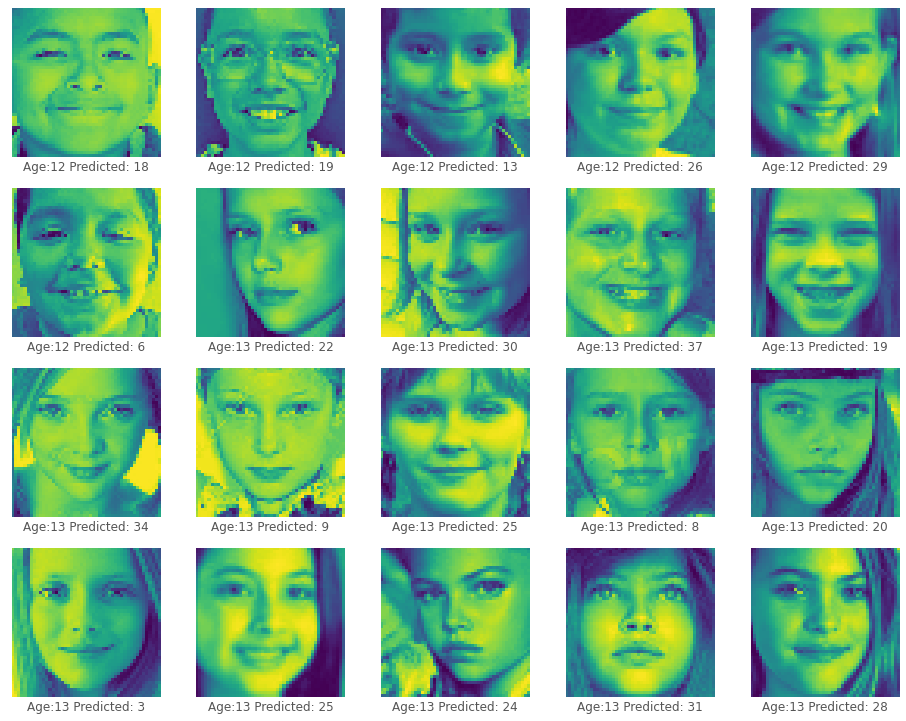

In [35]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+" Predicted: "+str(round(y_pred_best[i][0])))
plt.show()